# 数据可视化作业题目

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [4]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [31]:
def lineplot(x_data, y_data, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制拟合曲线，lw=linewidth，alpha=transparancy
    ax.plot(x_data, y_data, lw = 2, color = '#539caf', alpha = 1)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 设置坐标轴刻度
    ax.set_xticks(x_data)

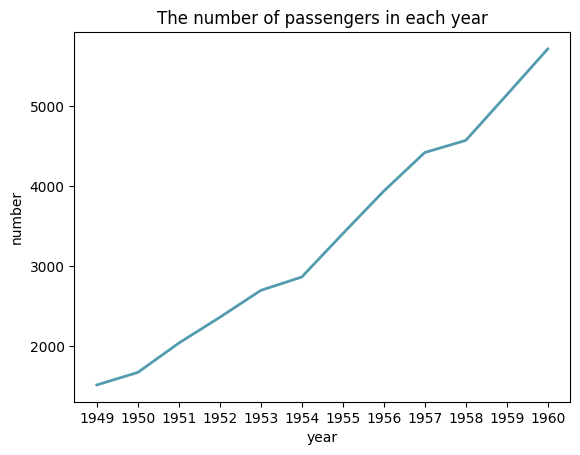

In [32]:
data_yearsum = data.groupby('year').agg({'passengers':'sum'})
lineplot(data_yearsum.index, data_yearsum.passengers, 'year', 'number', 'The number of passengers in each year')

In [48]:
def barplot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()
    # 柱状图
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    
    # 添加标题和坐标说明
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
    # 设置坐标轴刻度
    ax.set_xticks(x_data)

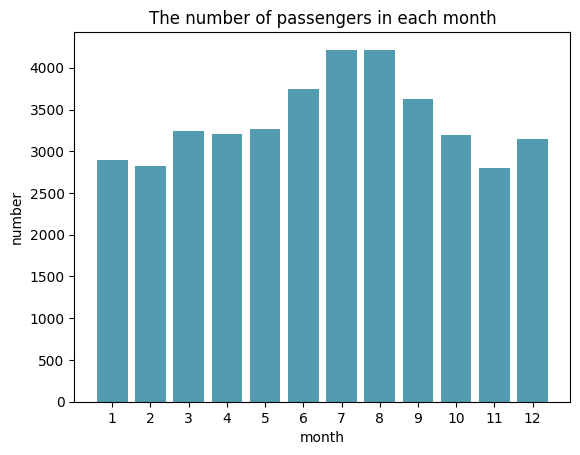

In [49]:
data_monthsum = data.groupby('month', observed=True).agg({'passengers':'sum'})
data_monthsum.insert(loc=0, column='month', value=range(1,13))
barplot(data_monthsum.month, data_monthsum.passengers, 'month', 'number', 'The number of passengers in each month')

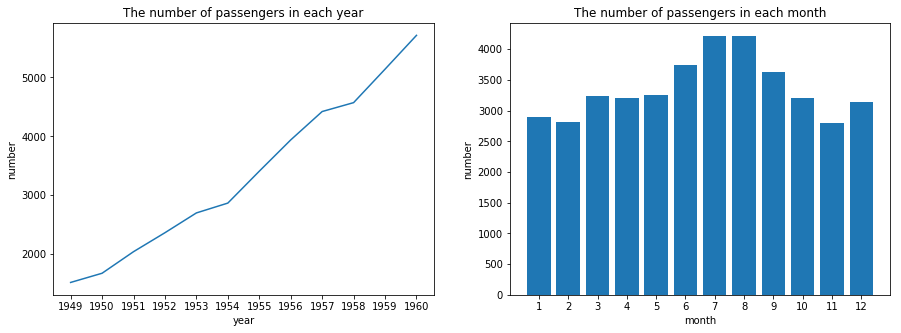

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [4]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
import numpy as np
def fourscatterplot(data, ax, color):
    ax[0][0].scatter(data.sepal_length, data.petal_length, s = 4, color = color)
    ax[0][0].set_xlabel('s_l')
    ax[0][0].set_ylabel('p_l')
    ax[0][0].set_title('s_l VS. p_l')
    ax[0][0].set_xticks(np.arange(4.5, 8.5, 0.5))
    ax[0][1].scatter(data.sepal_length, data.petal_width, s = 4, color = color)
    ax[0][1].set_xlabel('s_l')
    ax[0][1].set_ylabel('p_w')
    ax[0][1].set_title('s_l VS. p_w')
    ax[0][1].set_xticks(np.arange(4.5, 8.5, 0.5))
    ax[1][0].scatter(data.sepal_width, data.petal_length, s = 4, color = color)
    ax[1][0].set_xlabel('s_w')
    ax[1][0].set_ylabel('p_l')
    ax[1][0].set_title('s_w VS. p_l')
    ax[1][1].scatter(data.sepal_width, data.petal_width, s = 4, color = color)
    ax[1][1].set_xlabel('s_w')
    ax[1][1].set_ylabel('p_w')
    ax[1][1].set_title('s_w VS. p_w')

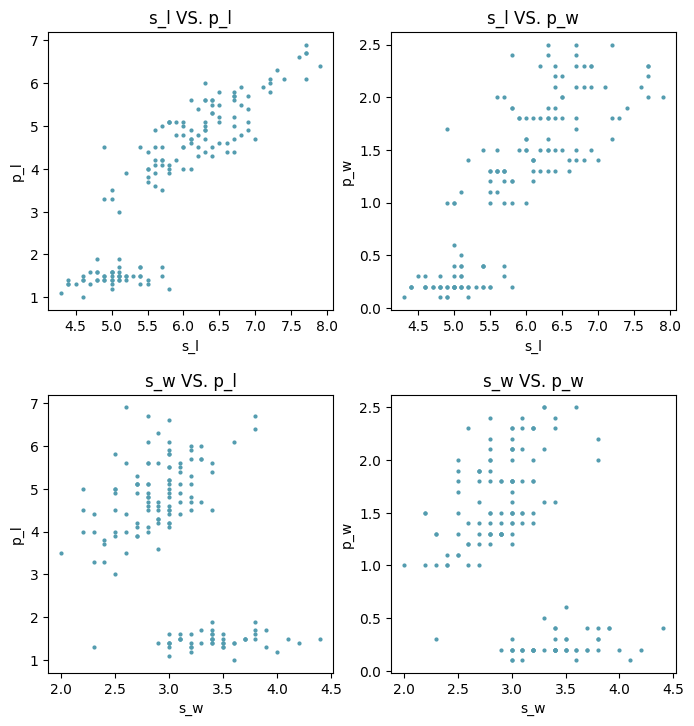

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(7,7))
fig.tight_layout(h_pad=4)
fourscatterplot(data, ax, '#539caf')

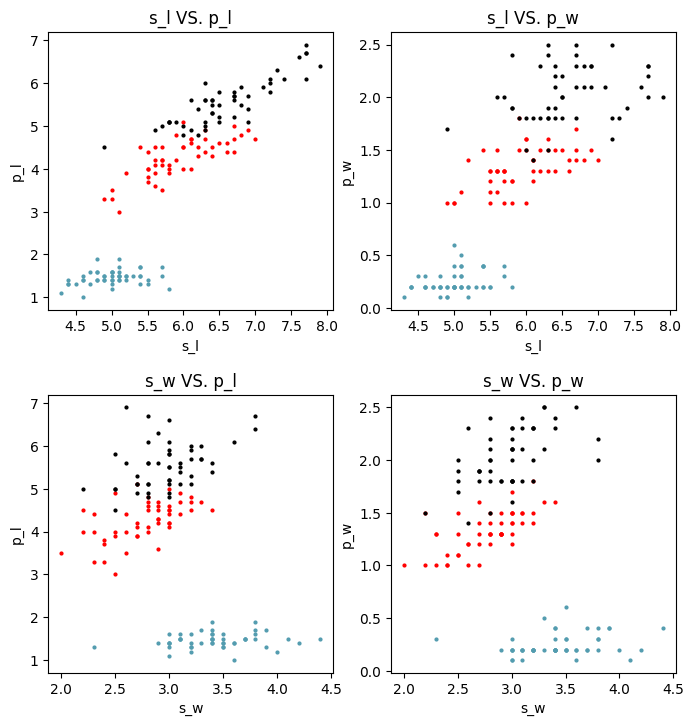

In [28]:
flowers = ['setosa', 'versicolor', 'virginica']
data_flowers = []
for i in flowers:
    j = data.groupby('species').get_group(i)
    data_flowers.append(j)

fig, ax = plt.subplots(2, 2, figsize=(7,7))
fig.tight_layout(h_pad=4)
colors = ['#539caf', 'r', 'k']
for i in range(len(flowers)):
    fourscatterplot(data_flowers[i], ax, colors[i])

In [20]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

In [34]:
flower_feature = []
for i in data_flowers[0].columns:
    flower_feature.append(i)

data_flowers_all = []
for i in data_flowers:
    j = i.drop('species', axis=1)
    flower_value = []
    for k in j.columns:
        value = j[k].values.tolist()
        flower_value.append(value)
    data_flowers_all.append(flower_value)

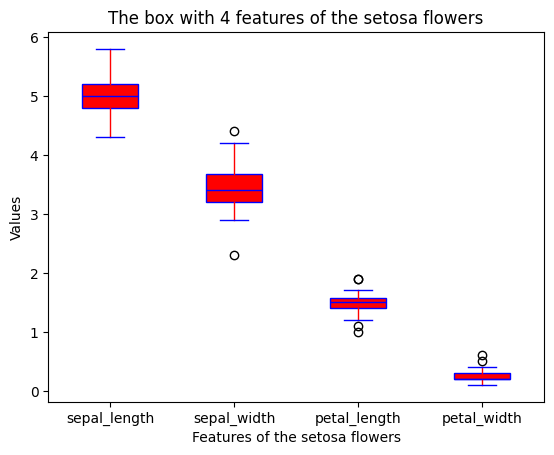

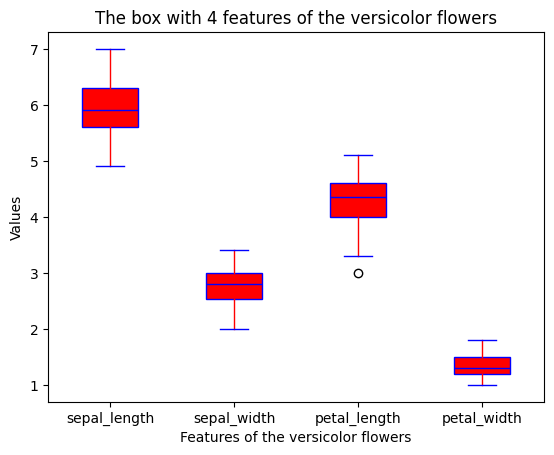

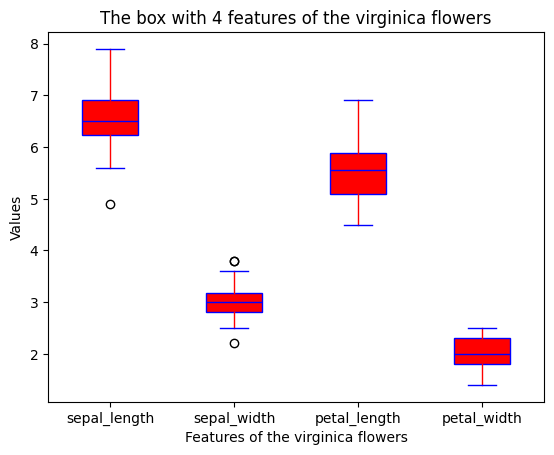

In [42]:
for i in range(len(data_flowers_all)):
        boxplot(x_data = flower_feature[:4]
                , y_data = data_flowers_all[i]
                , base_color = 'b'
                , median_color = 'r'
                , x_label = 'Features of the %s flowers'%flowers[i]
                , y_label = 'Values'
                , title = 'The box with 4 features of the %s flowers'%flowers[i])

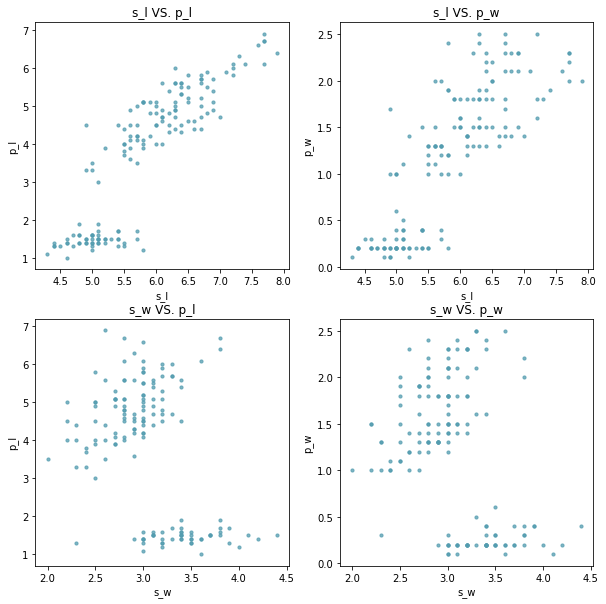

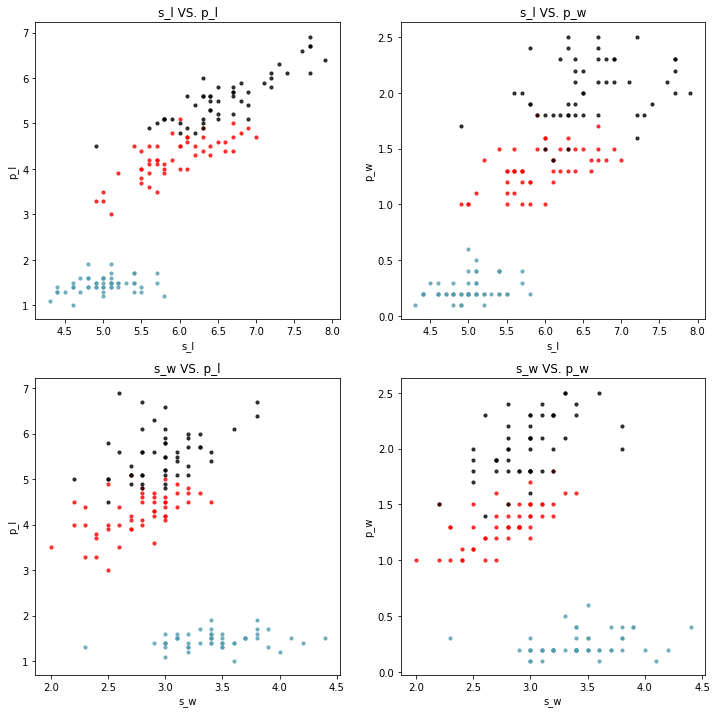

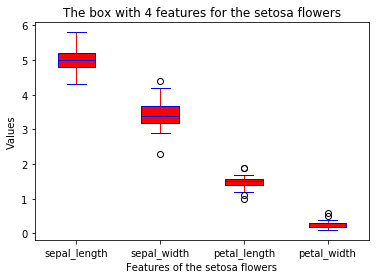

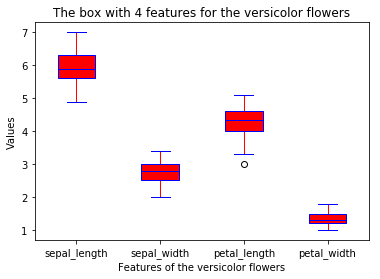

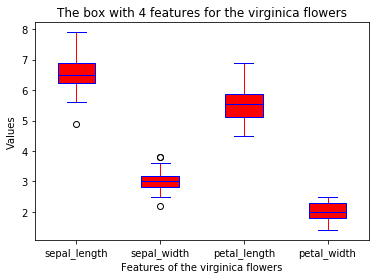

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [268]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [269]:
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        _, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 不显示顶部和右侧的坐标线
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

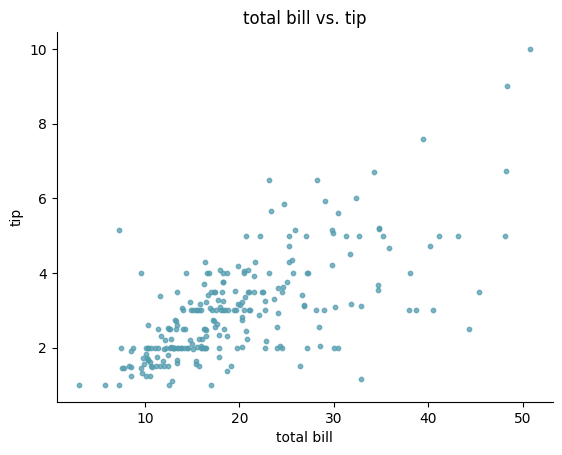

In [270]:
scatterplot(data.total_bill, data.tip, "total bill", "tip", "total bill vs. tip")

In [271]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(data['total_bill']) # 线性回归增加常数项
y = data['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, fitdata, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = fitdata[:,2]

In [275]:
# 获得5%置信区间的上下界
predict_mean_ci_low, predict_mean_ci_upp = fitdata[:,4:6].T

# 创建置信区间DataFrame，上下界
import pandas as pd
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序

# 绘制置信区间
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax

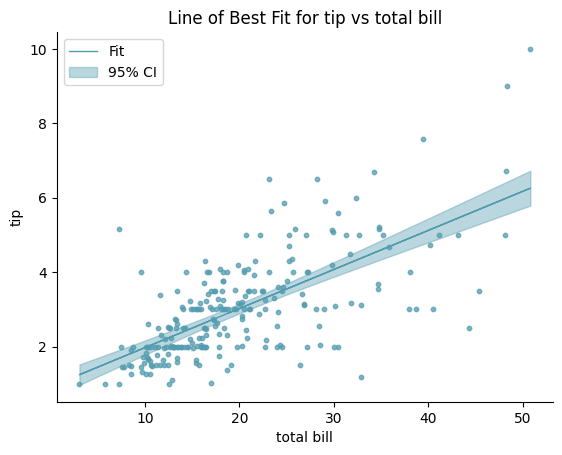

In [278]:
ax = lineplotCI(x_data = data['total_bill']
         , y_data = fitted_values
         , sorted_x = CI_df['x_data']
         , low_CI = CI_df['low_CI']
         , upper_CI = CI_df['upper_CI']
         , x_label = 'total bill'
         , y_label = 'tip'
         , title = 'Line of Best Fit for tip vs total bill')

scatterplot(data.total_bill, data.tip, "total bill", "tip", "Line of Best Fit for tip vs total bill", ax=ax)

In [16]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

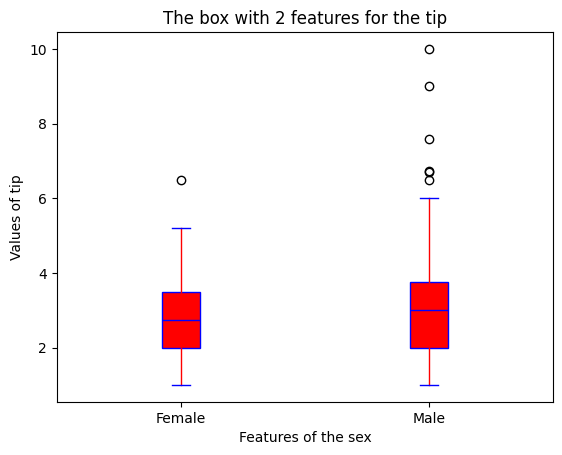

In [18]:
sex = ['Female', 'Male']
data_sex = []
for i in sex:
    j = data.groupby('sex', observed=True).get_group(i)
    data_sex.append(j.tip)

boxplot(sex, data_sex, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the sex'
        , y_label = 'Values of tip'
        , title = 'The box with 2 features for the tip')


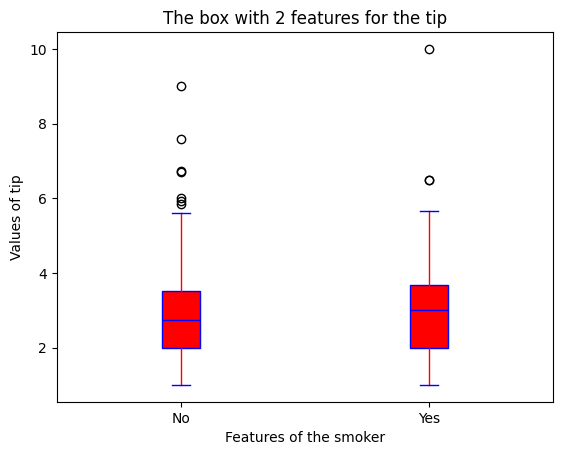

In [20]:
smoker = ['No', 'Yes']
data_smoker = []
for i in smoker:
    j = data.groupby('smoker', observed=True).get_group(i)
    data_smoker.append(j.tip)

boxplot(smoker, data_smoker, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the smoker'
        , y_label = 'Values of tip'
        , title = 'The box with 2 features for the tip')

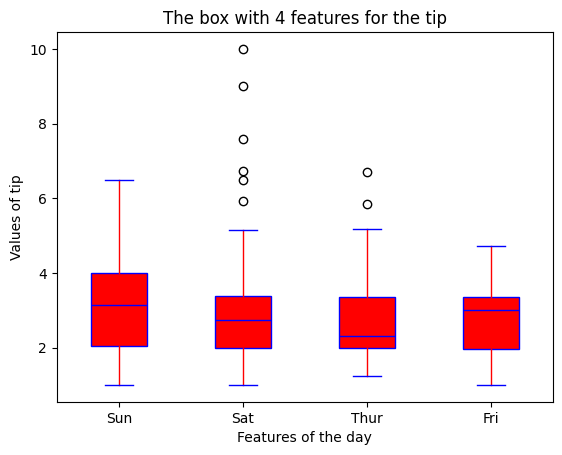

In [22]:
day = ['Sun', 'Sat', 'Thur', 'Fri']
data_day = []
for i in day:
    j = data.groupby('day', observed=True).get_group(i)
    data_day.append(j.tip)

boxplot(day, data_day, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the day'
        , y_label = 'Values of tip'
        , title = 'The box with 4 features for the tip')

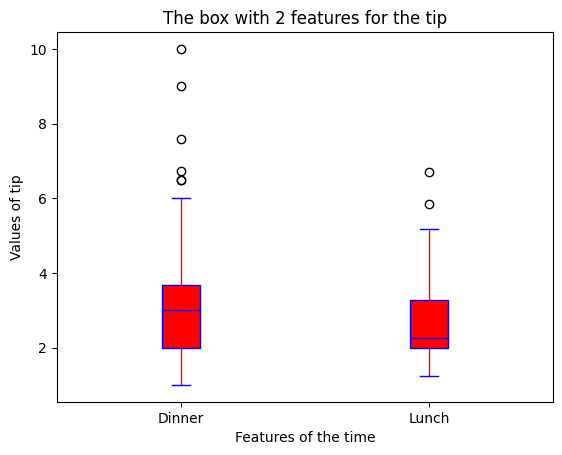

In [23]:
time = ['Dinner', 'Lunch']
data_time = []
for i in time:
    j = data.groupby('time', observed=True).get_group(i)
    data_time.append(j.tip)

boxplot(time, data_time, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the time'
        , y_label = 'Values of tip'
        , title = 'The box with 2 features for the tip')

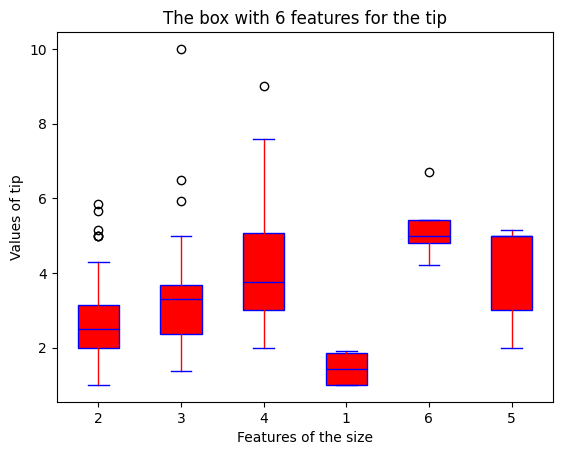

In [25]:
size = [2, 3, 4, 1, 6, 5]
data_size = []
for i in size:
    j = data.groupby('size', observed=True).get_group(i)
    data_size.append(j.tip)

boxplot(size, data_size, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the size'
        , y_label = 'Values of tip'
        , title = 'The box with 6 features for the tip')

In [118]:
data_smoker_sex = data.groupby(['sex', 'smoker'], observed=True).agg({'tip':'mean'}).unstack()
data_smoker_sex.columns = data_smoker_sex.columns.droplevel(0)

In [119]:
import numpy as np
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    x_data_range = range(len(x_data))

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data_range + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data_range)
    ax.set_xticklabels(x_data)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

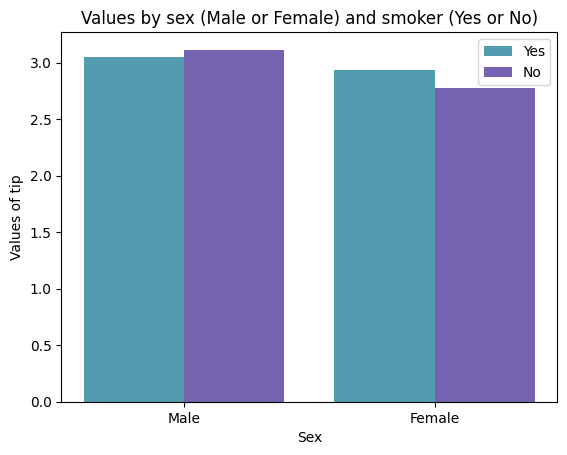

In [120]:
groupedbarplot(x_data = data_smoker_sex.index.values
               , y_data_list = [data_smoker_sex['Yes'], data_smoker_sex['No']]
               , y_data_names = ['Yes', 'No']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Values of tip'
               , title = 'Values by sex (Male or Female) and smoker (Yes or No)')

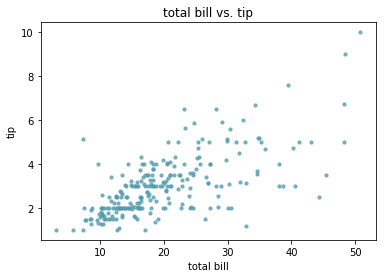

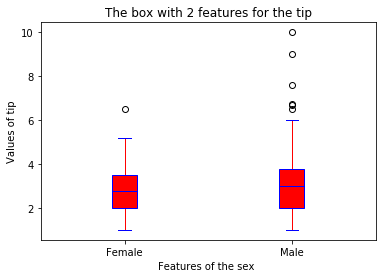

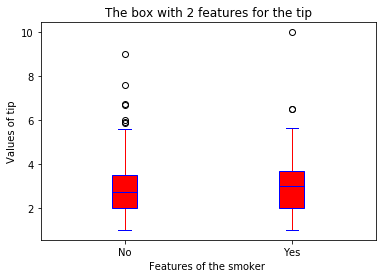

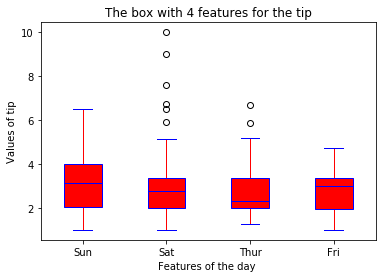

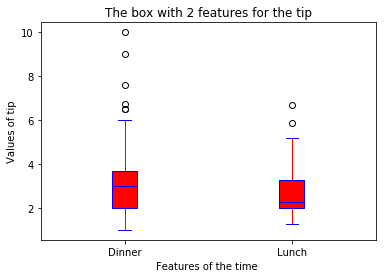

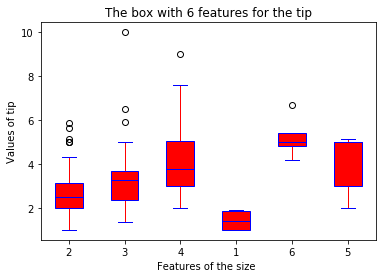

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


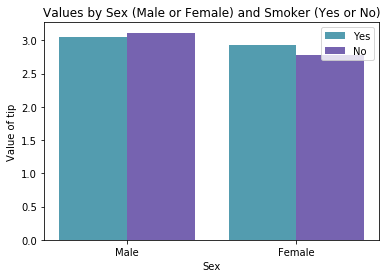

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [10]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [150]:
data_survived_pclass = data.groupby('pclass').agg({'survived':'sum'})
def get_total(x):
    total = len(x.index)
    return total
data_survived_pclass['total'] = data.groupby('pclass').apply(get_total)
data_survived_pclass['unsurvived'] = data_survived_pclass['total'] - data_survived_pclass['survived']
data_survived_pclass['survived_prop'] = data_survived_pclass['survived']/data_survived_pclass['total']
data_survived_pclass['unsurvived_prop'] = data_survived_pclass['unsurvived']/data_survived_pclass['total']

data_survived_pclass

,survived,total,unsurvived,survived_prop,unsurvived_prop
pclass,,,,,
1,136,216,80,0.629630,0.370370
2,87,184,97,0.472826,0.527174
3,119,491,372,0.242363,0.757637


In [252]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'best', bbox_to_anchor=(1, 1)) # 设定图例位置
    return ax

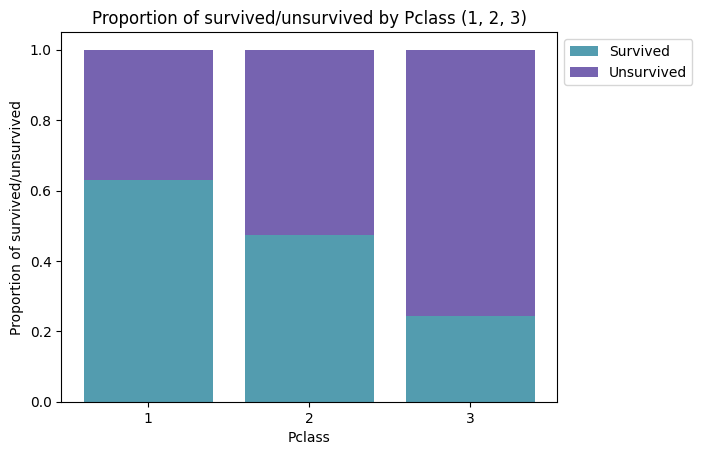

In [253]:
ax = stackedbarplot(x_data = data_survived_pclass.index.values
               , y_data_list = [data_survived_pclass['survived_prop'], data_survived_pclass['unsurvived_prop']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Pclass'
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by Pclass (1, 2, 3)')
ax.set_xticks(range(1, 4))
plt.show()

In [254]:
data_survived_sex = data.groupby('sex').agg({'survived':'sum'})
def get_total(x):
    total = len(x.index)
    return total
data_survived_sex['total'] = data.groupby('sex').apply(get_total)
data_survived_sex['unsurvived'] = data_survived_sex['total'] - data_survived_sex['survived']
data_survived_sex['survived_prop'] = data_survived_sex['survived']/data_survived_sex['total']
data_survived_sex['unsurvived_prop'] = data_survived_sex['unsurvived']/data_survived_sex['total']

data_survived_sex

,survived,total,unsurvived,survived_prop,unsurvived_prop
sex,,,,,
female,233,314,81,0.742038,0.257962
male,109,577,468,0.188908,0.811092


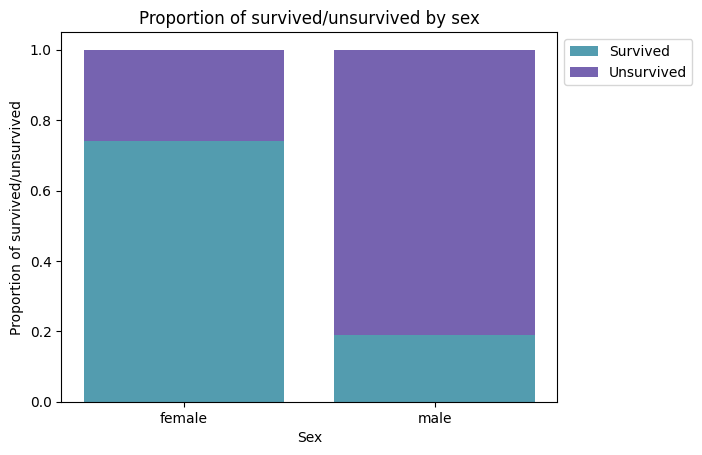

In [255]:
stackedbarplot(x_data = data_survived_sex.index.values
               , y_data_list = [data_survived_sex['survived_prop'], data_survived_sex['unsurvived_prop']]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Sex'
               , y_label = 'Proportion of survived/unsurvived'
               , title = 'Proportion of survived/unsurvived by sex')
plt.show()

In [176]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # 设置样式
    ax.boxplot(y_data
               # 箱子是否颜色填充
               , patch_artist = True
               # 中位数线颜色
               , medianprops = {'color': base_color}
               # 箱子颜色设置，color：边框颜色，facecolor：填充颜色
               , boxprops = {'color': base_color, 'facecolor': median_color}
               # 猫须颜色whisker
               , whiskerprops = {'color': median_color}
               # 猫须界限颜色whisker cap
               , capprops = {'color': base_color})

    # 箱图与x_data保持一致
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

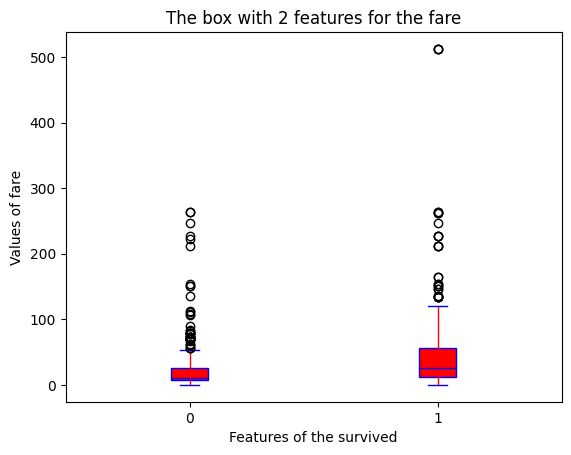

In [178]:
survived = [0, 1]
data_fare = []
for i in survived:
    j = data.groupby('survived', observed=True).get_group(i)
    data_fare.append(j.fare)

boxplot(survived, data_fare, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the survived'
        , y_label = 'Values of fare'
        , title = 'The box with 2 features for the fare')

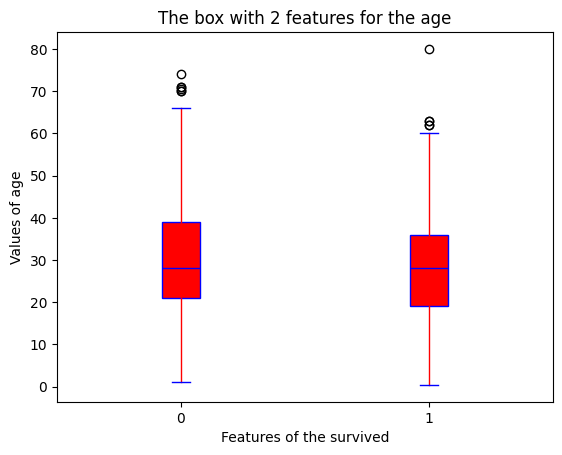

In [186]:
survived = [0, 1]
data_age = []
for i in survived:
    j = data.groupby('survived', observed=True).get_group(i).dropna(subset=['age'])
    data_age.append(j.age)

boxplot(survived, data_age, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the survived'
        , y_label = 'Values of age'
        , title = 'The box with 2 features for the age')

In [11]:
data_embarked = data.groupby(['embarked', 'pclass'], observed=True).count().loc[:,['survived']].unstack()
data_embarked.columns = data_embarked.columns.droplevel(0)
data_embarked

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [12]:
import numpy as np
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)
    x_data_range = range(len(x_data))

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data_range + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_xticks(x_data_range)
    ax.set_xticklabels(x_data)
    ax.set_title(title)
    ax.legend(loc = 'best')

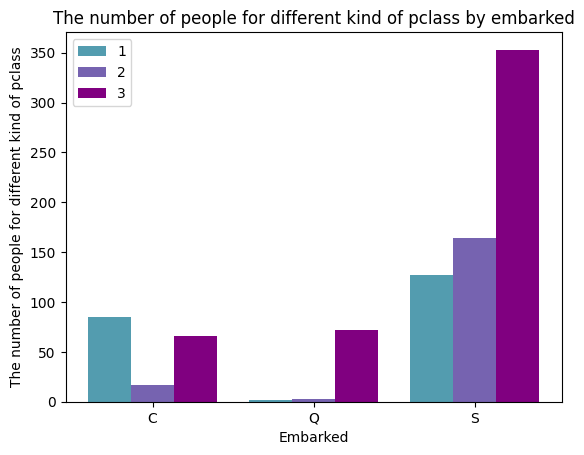

In [13]:
groupedbarplot(x_data = ['C', 'Q', 'S']
               , y_data_list = [data_embarked[1], data_embarked[2], data_embarked[3]]
               , y_data_names = [1, 2, 3]
               , colors = ['#539caf', '#7663b0', 'purple']
               , x_label = 'Embarked'
               , y_label = 'The number of people for different kind of pclass'
               , title = 'The number of people for different kind of pclass by embarked')

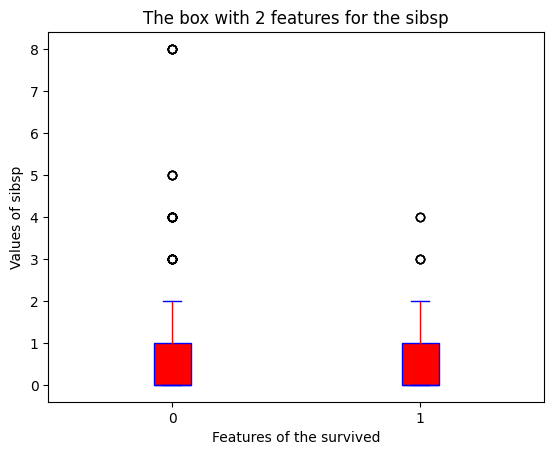

In [190]:
survived = [0, 1]
data_sibsp = []
for i in survived:
    j = data.groupby('survived', observed=True).get_group(i)
    data_sibsp.append(j.sibsp)

boxplot(survived, data_sibsp, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the survived'
        , y_label = 'Values of sibsp'
        , title = 'The box with 2 features for the sibsp')

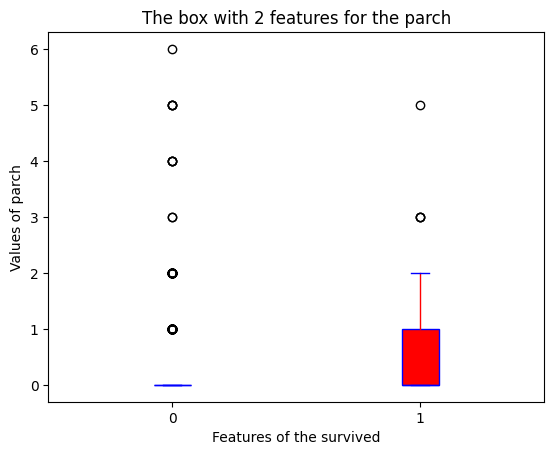

In [192]:
survived = [0, 1]
data_parch = []
for i in survived:
    j = data.groupby('survived', observed=True).get_group(i)
    data_parch.append(j.parch)

boxplot(survived, data_parch, 
        base_color = 'b'
        , median_color = 'r'
        , x_label = 'Features of the survived'
        , y_label = 'Values of parch'
        , title = 'The box with 2 features for the parch')

In [219]:
data_alone = data.groupby(['alone', 'survived'], observed=True).count().loc[:,['pclass']].unstack()
data_alone.columns = data_alone.columns.droplevel(0)
data_alone

survived,0,1
alone,,
False,175,179
True,374,163


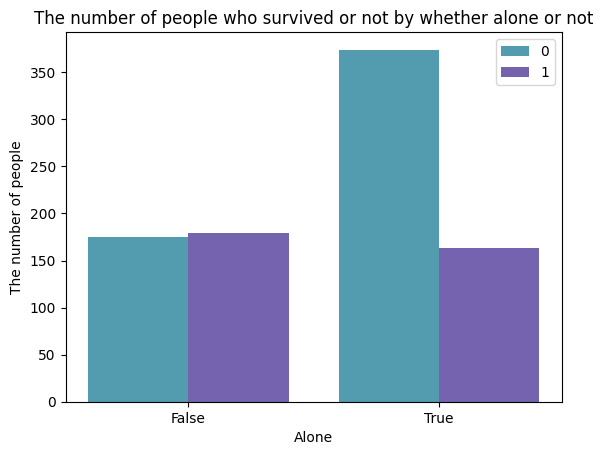

In [247]:
groupedbarplot(x_data = data_alone.index.values
               , y_data_list = [data_alone[0], data_alone[1]]
               , y_data_names = [0, 1]
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Alone'
               , y_label = 'The number of people'
               , title = 'The number of people who survived or not by whether alone or not')

        survived  unservived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136         216    216       0.629630              1.0
2             87         184    184       0.472826              1.0
3            119         491    491       0.242363              1.0


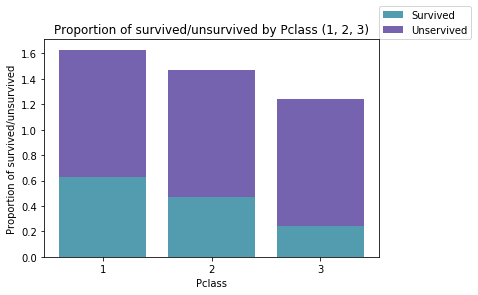

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


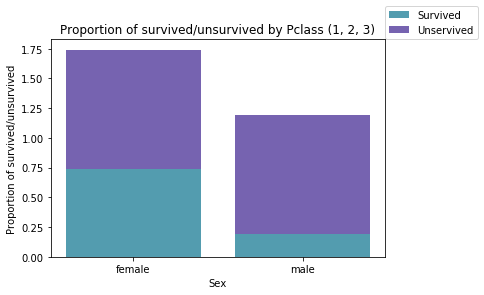

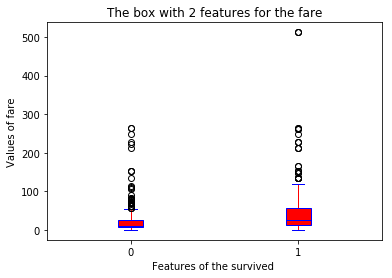

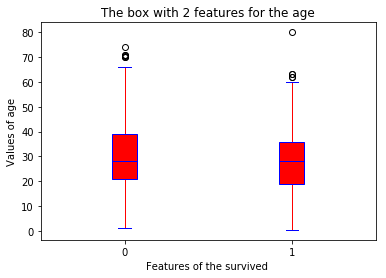

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


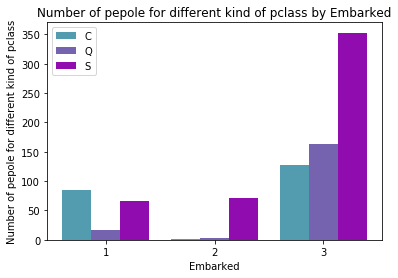

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

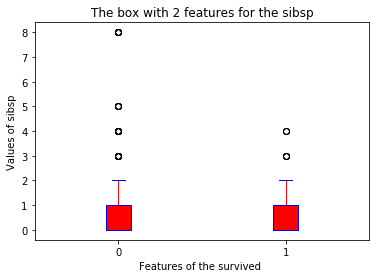

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

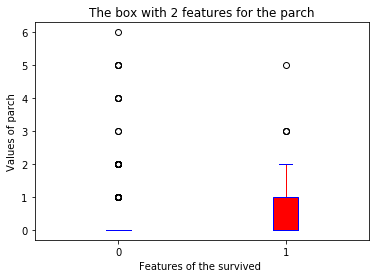

survived    0    1
alone             
False     175  179
True      374  163


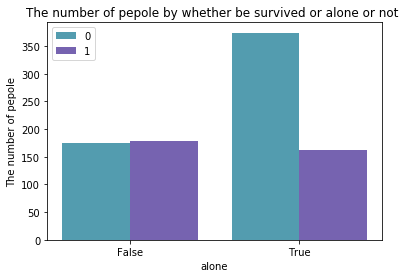